In [1]:
import numpy as np
from math import comb
import copy
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
p_wz = 0.2
p_ww = 0.8

users = 100
num_states = users + 1

In [3]:
P = np.zeros((num_states, num_states))

for current_logged in range(num_states):
    p_zz = 0.1 + 0.008 * current_logged
    p_zw = 1 - p_zz
    
    for next_logged in range(num_states):  
        
        diff = next_logged - current_logged
        
        to_login = 0
        to_logout = 0
        
        if diff > 0:
            to_login = diff
        if diff < 0:
            to_logout = -diff
            
        prob = 0

        logged_out = users - max(current_logged, next_logged)
        logged_in = users - logged_out - to_login - to_logout

        while logged_in >= 0 and logged_out >= 0:
            partial = 1
            partial *= p_zz**logged_in
            partial *= p_ww**logged_out
            partial *= p_wz**to_login
            partial *= p_zw**to_logout
            
            prob += partial * comb(current_logged, to_logout) * comb(users - current_logged, to_login)
            
            logged_in -= 1
            logged_out -= 1
            to_login += 1
            to_logout += 1

        P[current_logged][next_logged] = prob

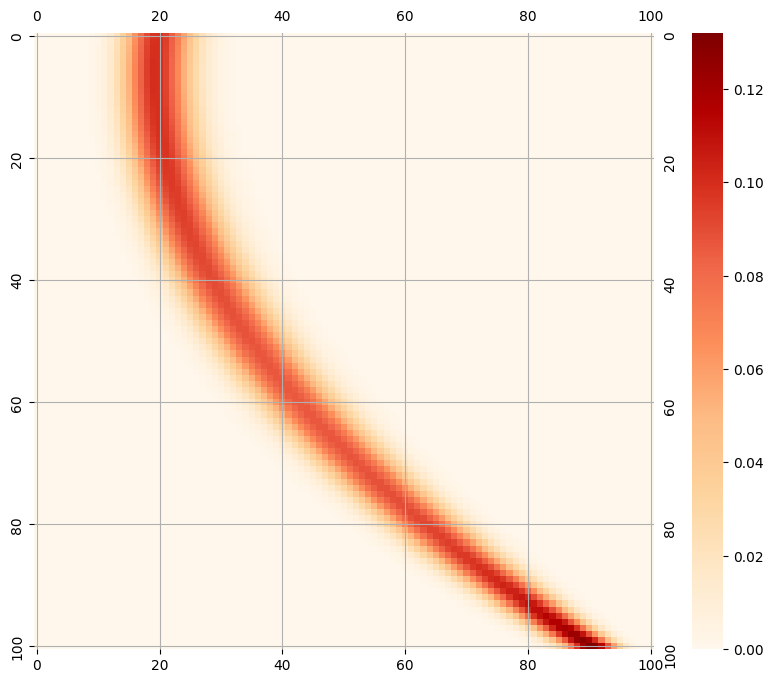

In [4]:
plt.figure(figsize=(10, 8)) 
sns.heatmap(P, cmap='OrRd', xticklabels=20, yticklabels=20)
plt.tick_params(labeltop=True, labelright=True)
plt.grid()

In [5]:
P_new = copy.deepcopy(P)

tolerance = 1e-5
n = 0
norms = []

while True:
    n += 1
    
    P_old = copy.deepcopy(P_new)
    P_new = np.dot(P_old, P)
    
    norm = np.linalg.norm(P_new - P_old, ord='fro')
    norms.append(norm)

    if norm < tolerance:
        break

print("Value of:", n)

Value of: 14


Text(0, 0.5, 'Probability')

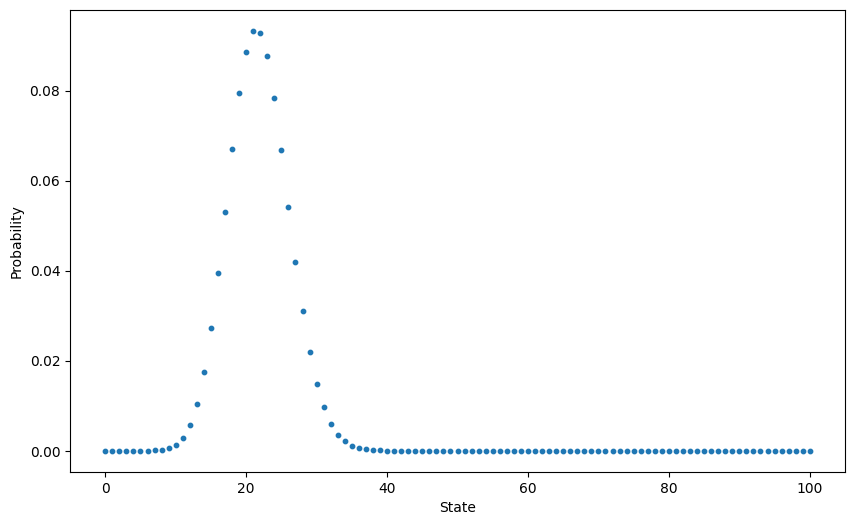

In [6]:
plt.figure(figsize=(10, 6)) 
plt.scatter(range(num_states), P_new[0], s=10)
plt.xlabel("State")
plt.ylabel("Probability")

In [7]:
initial_states = [0, 25, 50, 75, 100]
N = 10**4

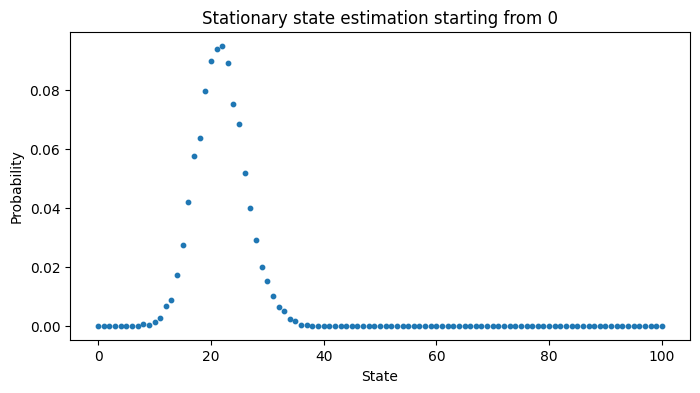

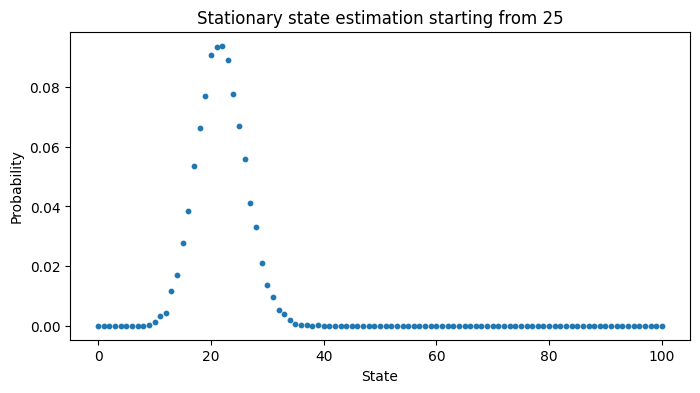

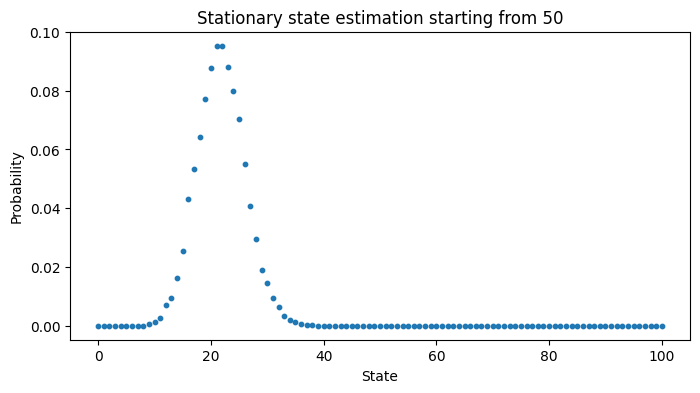

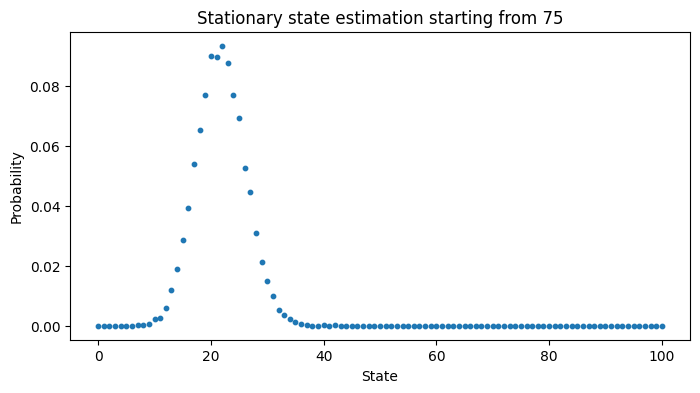

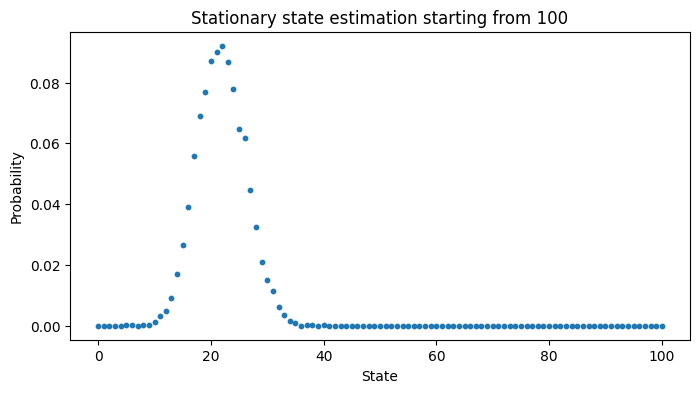

In [8]:
for initial_state in initial_states:
    states_counts = np.zeros((num_states,))
    for _ in range(N):
        current_state = initial_state
        for _ in range(n):
            random = np.random.uniform()
            cumulative_prob = 0
            
            for next_state in range(num_states):
                cumulative_prob += P[current_state][next_state]
                if random <= cumulative_prob:
                    current_state = next_state
                    break     
                
        states_counts[current_state] += 1
        
    estimation = states_counts / N
    
    plt.figure(figsize=(8, 4)) 
    plt.scatter(range(num_states), estimation, s=10)
    plt.title(f"Stationary state estimation starting from {initial_state}")
    plt.xlabel("State")
    plt.ylabel("Probability")